In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
df = pd.read_csv('../../Dataset/VCB-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
# 2.Read file csv and split test train with ratio 7:3
train_size = int(0.7 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [4]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [5]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [7]:
# 6.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)


In [8]:
# 6.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index, last_index+60)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)


In [9]:
# 6.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)


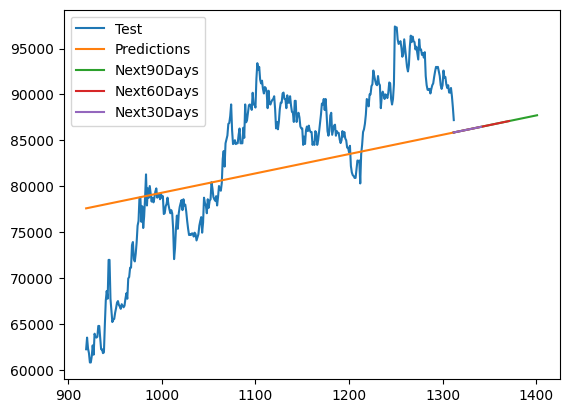

In [10]:
#7. Plotting
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)

plt.plot(last_data_90,y_next_90_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data,y_next_30_days)
plt.legend(['Test', 'Predictions','Next90Days','Next60Days','Next30Days'])
plt.show()

In [11]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 7.14276101227656
Mean Absolute Error (MAE): 5818.512952938235
Root Mean Squared Error (RMSE): 6987.984927529279
